In [2]:
import numpy as np
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


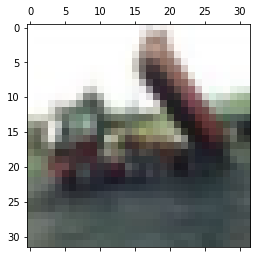

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

array([9], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [20]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
782/782 [==============================] - 69s 88ms/step - loss: 1.5466 - accuracy: 0.4325 - val_loss: 1.2366 - val_accuracy: 0.5562
Epoch 2/10
782/782 [==============================] - 66s 85ms/step - loss: 1.1528 - accuracy: 0.5913 - val_loss: 1.0649 - val_accuracy: 0.6236
Epoch 3/10
782/782 [==============================] - 66s 84ms/step - loss: 0.9849 - accuracy: 0.6548 - val_loss: 0.9986 - val_accuracy: 0.6461
Epoch 4/10
782/782 [==============================] - 66s 84ms/step - loss: 0.8751 - accuracy: 0.6903 - val_loss: 0.9508 - val_accuracy: 0.6718
Epoch 5/10
782/782 [==============================] - 66s 85ms/step - loss: 0.7860 - accuracy: 0.7246 - val_loss: 0.9524 - val_accuracy: 0.6702
Epoch 6/10
782/782 [==============================] - 66s 85ms/step - loss: 0.7136 - accuracy: 0.7497 - val_loss: 0.8634 - val_accuracy: 0.7036
Epoch 7/10
782/782 [==============================] - 66s 84ms/step - loss: 0.6470 - accuracy: 0.7721 - val_loss: 0.8648 - val_accuracy:

313/313 - 4s - loss: 0.8929 - accuracy: 0.7149


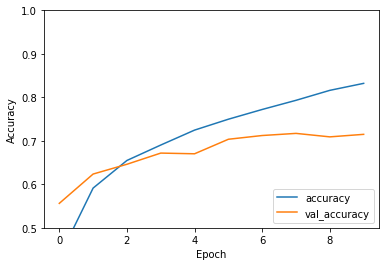

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)